<center>
    <img src="https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png" width="600" alt="cognitiveclass.ai logo"  />
</center>

# Train and Evaluate Regression Model

### 1. Load & Understand our data

In [13]:
import pandas as pd 
data = pd.read_excel('BFP.xlsx', sheet_name='Combined')
data['Crude_Rands'] = (data.Avg_Brent_Crude * data.Ex_Rate)

# Remove the outlier which is less that 350 
#data = data.loc[(data['BFP'] > 350)]
#data = data.loc[(data['BFP'] < 1000)]

data.head()

,Date,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands
0,2010-01-01,406.263,7.5246,74.31,786.0,559.153026
1,2010-02-01,424.263,7.4735,76.84,804.0,574.263740
2,2010-03-01,430.563,7.6902,73.17,810.3,562.691934
3,2010-04-01,453.063,7.4753,78.89,858.3,589.726417
4,2010-05-01,465.063,7.3749,85.75,871.8,632.397675


In [14]:
our_features = ['Avg_Brent_Crude', 'Ex_Rate', 'Crude_Rands']
data[our_features + ['BFP']].describe()

,Avg_Brent_Crude,Ex_Rate,Crude_Rands,BFP
count,147.000000,147.000000,147.000000,147.000000
mean,75.918231,11.940469,843.021648,640.008156
std,26.278941,3.130337,205.333792,137.463177
min,18.990000,6.770100,350.880129,274.770000
25%,54.985000,8.794050,665.399415,549.820000
50%,72.510000,12.860900,842.732274,620.870000
75%,102.730000,14.463200,971.138913,727.120000
max,126.390000,18.477100,1469.238100,1100.270000


C:\Users\PC\AppData\Local\Temp/ipykernel_17904/3942328809.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


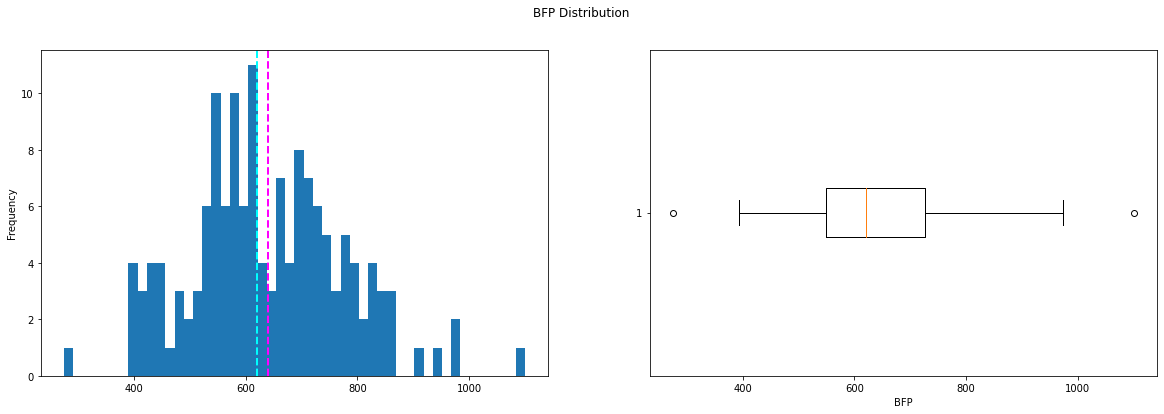

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = data['BFP']


# Create a figure for 2 subplots (1 rows, 2 column)
fig, ax = plt.subplots(1, 2, figsize = (20,6))

# Plot the histogram   
ax[0].hist(label, bins=50)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('BFP')

# Add a title to the Figure
fig.suptitle('BFP Distribution')

# Show the figure
fig.show()


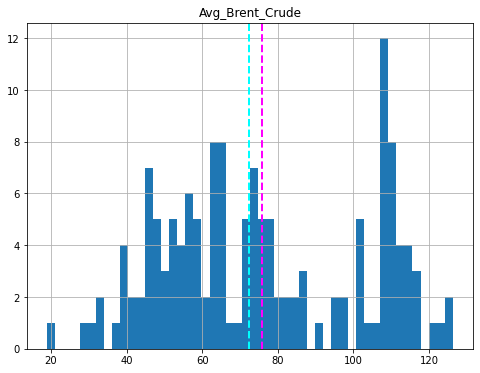

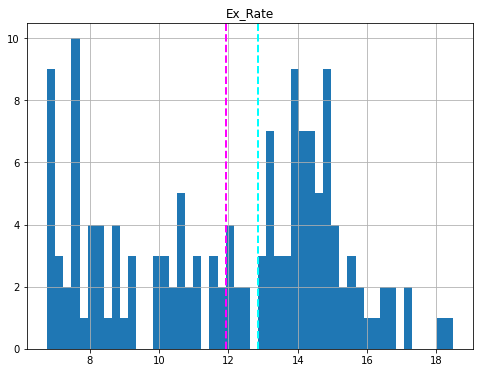

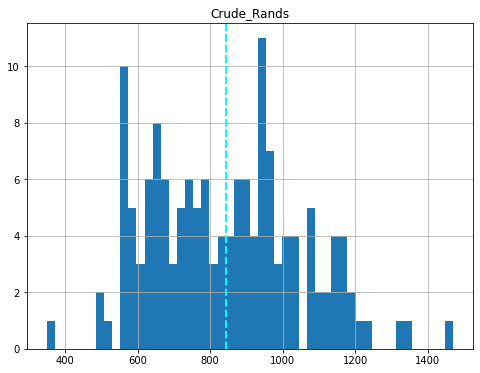

In [16]:
# Plot a histogram for each numeric feature
for col in our_features:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

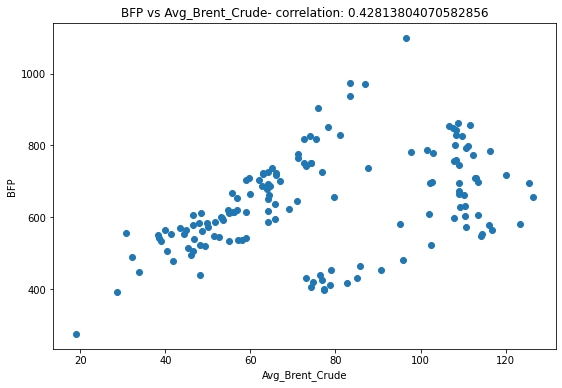

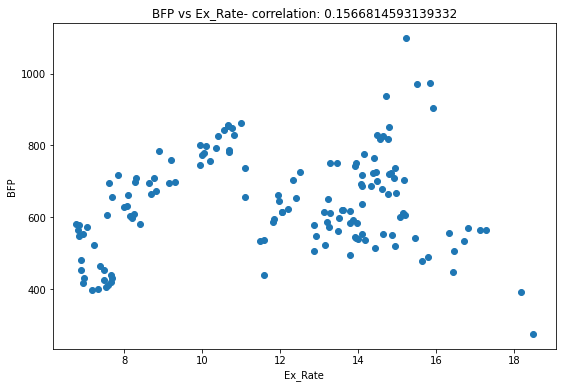

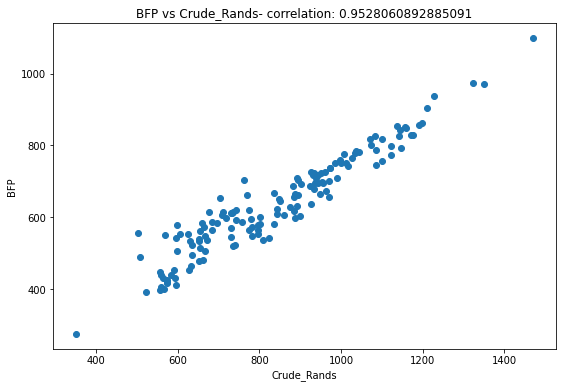

In [17]:
for col in our_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['BFP']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('BFP')
    ax.set_title('BFP vs ' + col + '- correlation: ' + str(correlation))
plt.show()


### Train a Regression Model

In [18]:
X, y = data['Crude_Rands'].values, data['BFP']
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[559.153026 574.26374  562.691934 589.726417 632.397675 584.26725
 572.318388 596.056076 566.324542 555.973083]

Labels:
0    406.263
1    424.263
2    430.563
3    453.063
4    465.063
5    438.063
6    420.063
7    410.063
8    400.063
9    396.563
Name: BFP, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split

# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 117 rows
Test Set: 30 rows


In [20]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train.reshape(-1, 1), y_train)
print (model)

LinearRegression()


### Evaluatee the Trained Model

In [21]:
import numpy as np

predictions = model.predict(X_test.reshape(-1, 1))
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [485. 668. 712. 721. 944. 841. 786. 661. 744. 721.]
Actual labels   :  7      410.063
24     598.550
27     694.570
120    699.970
143    973.970
51     848.590
43     799.810
22     629.149
112    777.170
26     656.170
Name: BFP, dtype: float64


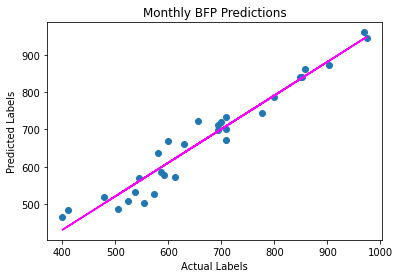

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Monthly BFP Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 1298.8858858255264
RMSE: 36.04005945923961
R2: 0.943084917972465
